In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
lfp = np.loadtxt('LFP_trails.txt')
lfp.shape

(110, 1000)

In [4]:
lfp[0].shape

(1000,)

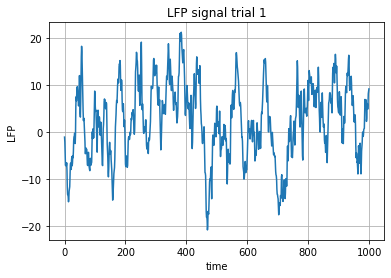

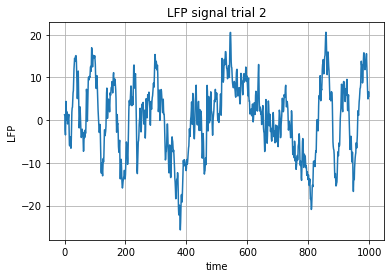

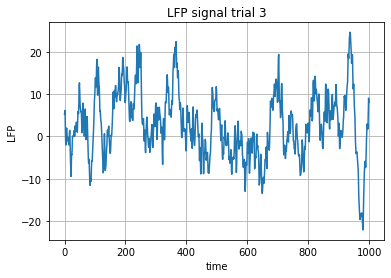

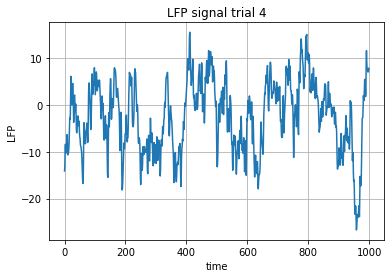

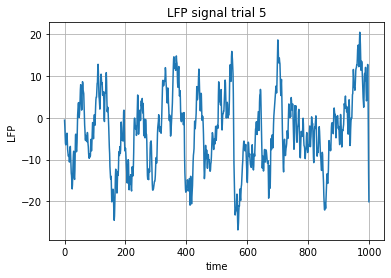

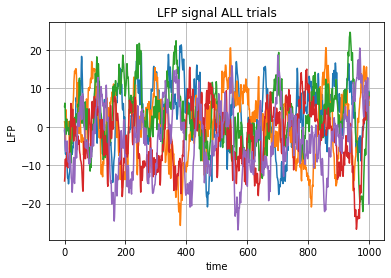

In [65]:
for i in range(5):
    plt.plot(lfp[i])
    plt.title('LFP signal trial {}'.format(i+1))
    plt.xlabel('time')
    plt.ylabel('LFP')
    plt.grid(True,which='both')
    plt.show()
    
for i in range(5):
    plt.plot(lfp[i],label = 'trial {}'.format(i+1))
    plt.title('LFP signal ALL trials')
    plt.xlabel('time')
    plt.ylabel('LFP')
    plt.grid(True,which='both')
plt.show()


In [9]:
print(lfp.shape)
lfp.mean(0).shape

(110, 1000)


(1000,)

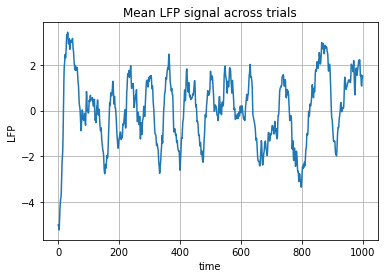

In [25]:
plt.plot(lfp.mean(0))
plt.title('Mean LFP signal across trials')
plt.xlabel('time')
plt.ylabel('LFP')
plt.grid(True,which='both')
plt.show()

In [131]:
lfp.shape

(110, 1000)

### FFT

In [11]:
#computation Fast Fourier Transform

from scipy.fft import fft, fftfreq

duration = 1
smp_rate = 1000
N = smp_rate * duration

yf = fft(lfp[0])
xf = fftfreq(N, 1 / smp_rate)

### Plotting the Spectrum

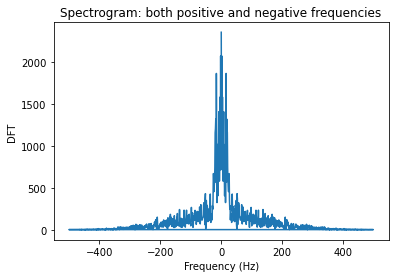

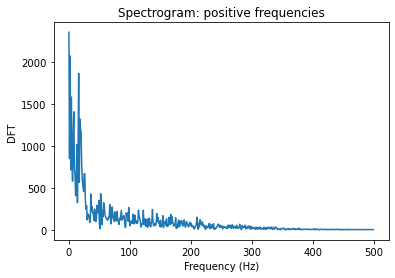

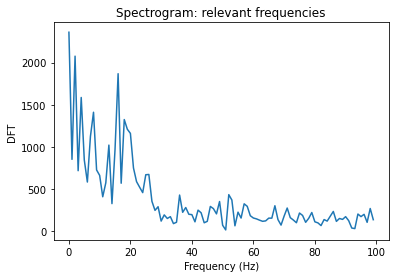

In [41]:
plt.title('Spectrogram: both positive and negative frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT')

plt.plot(xf, np.abs(yf))
plt.show()

plt.title('Spectrogram: positive frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT')

plt.plot(xf[0:500], np.abs(yf[0:500]))
plt.show()


plt.title('Spectrogram: relevant frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT')

plt.plot(xf[0:100], np.abs(yf[0:100]))
plt.show()

### Spectrum average

In [28]:
yf_tot = fft(lfp[0])

for i in range(1,len(lfp)):
    yf = fft(lfp[i])
    yf_tot = np.vstack([yf_tot,yf])
    
YF = np.abs(yf_tot).mean(0)

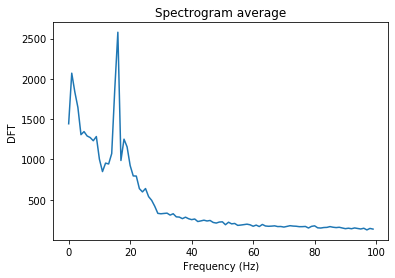

In [32]:
plt.title('Spectrogram average')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT')

plt.plot(xf[0:100], YF[0:100])
plt.show()

### Spectrogram

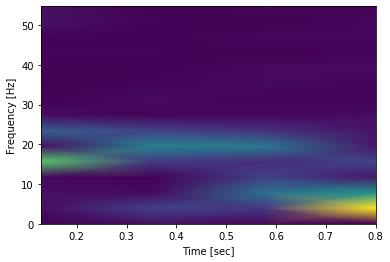

In [36]:
from scipy import signal

f, t, Sxx = signal.spectrogram(lfp[0], smp_rate)
plt.pcolormesh(t, f[0:15], Sxx[0:15], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()